In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import pairwise_distances
# from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans

ModuleNotFoundError: No module named 'pandas'

In [ ]:
!pip install pandas

  Using cached https://files.pythonhosted.org/packages/99/f0/f99700ef327e51d291efdf4a6de29e685c4d198cbf8531541fc84d169e0e/pandas-1.3.5.tar.gz
  Installing build dependencies ... done


In [131]:
def vis(ts, ls):
    for label in set(ls):
        plt.scatter(ts[:, 0][ls==label], ts[:, 1][ls==label], label=label)
    plt.legend()
    plt.show()
    
def cluster_sort(data, labels, rows, is_every=False):
    df = pd.DataFrame(data)
    df['cluster'] = labels
    df.sort_values('cluster', inplace=True)
    df.index = list(map(lambda x: rows[x], df.index))
    first_last = {}
    for i in set(labels):
        if is_every:
            first_last[i] = list(df[df['cluster']==i].index)
        else:
            first_last[i] = (df[df['cluster']==i].index[0], df[df['cluster']==i].index[-1])
    cl = df.pop('cluster')
    df.reindex(list(df.index), axis=1)
    return df, first_last

def get_pair_distance(d, w1, w2):
    return d[rows_ind[w1]][rows_ind[w2]]

class TSNE2(TSNE):
    def transform(*args, **kwargs):
        return TSNE.fit_transform(*args, **kwargs)
    
class DBSCAN2(DBSCAN):
    def predict(*args, **kwargs):
        return DBSCAN.fit(*args, **kwargs).labels_
    

In [132]:
X_train = pd.read_csv('fast_text_vectors.csv')
rows =  pd.read_excel(pd.ExcelFile('Contextualized Occasions.xlsx'), sheet_name='occasions')['Occasion'].values
rows_ind = {i: ix for ix, i in enumerate(rows)}
d = pairwise_distances(X_train, metric='cosine')

In [133]:
get_pair_distance(d, 'student attending a concert away from home in the morning',
                  'weekend brunch with friends in the morning')


0.5390532985206532

In [134]:
pipe = Pipeline([
#     ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2, svd_solver='full')),
    # or 
#     ('tsne', TSNE2(n_components=2)), # , learning_rate='auto', init='random', perplexity=3) 
    ('kmeans', KMeans(n_clusters=5)),#, precompute_distances=True)), # TODO swap transform and clusterization
    # or
#     ('dbscan', DBSCAN2(eps=0.175, min_samples=2)), 
])

In [135]:
data = X_train
# data = d
pipe.fit(data)
transf, labels = pipe.transform(data), pipe.predict(data)
# labels =  pipe.predict(data)

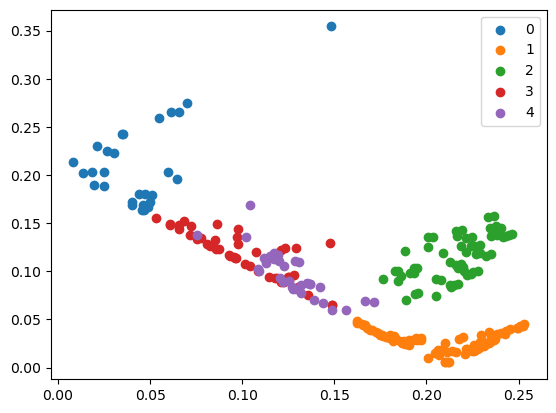

In [136]:
vis(transf, labels)

In [138]:
df, inx = cluster_sort(X_train, labels, rows, True)
# df.to_csv('csv_to_save.csv', index=False)
inx

{0: ['breakfast before school drop off',
  'family dining out',
  'eating breakfast while at work',
  'breakfast at school',
  'breakfast at work',
  'lunch at school',
  'lunch at work',
  "stocking up for a kid's party at the grocery",
  'dinner out weeknight',
  'eating breakfast in dorm',
  'stocking up for a party at the grocery',
  'wake up drink from the gas station',
  'wake up drink from the grocery store',
  'grocery shopping',
  'breakfast before class',
  'eating family breakfast at home',
  'thirsty while grocery shopping',
  'eating breakfast on campus',
  'dinner out alone',
  'eating a quick lunch out',
  'dinner after work',
  'dinner after classes',
  'weekend dining out',
  'grab a quick lunch',
  'grab a quick breakfast',
  'eating lunch while at work',
  'eating a quick breakfast out',
  'snacking late night out'],
 1: ['retirees attending a festival away from home in the evening',
  'student attending a museum / gallery away from home in the morning',
  'student a